# Pandas

The `Pandas` module is Python's fundamental data analytics library and it provides high-performance, easy-to-use data structures and tools for data analysis. Pandas allows for creating pivot tables, computing new columns based on other columns, etc. Pandas also facilitates grouping rows by column values and joining tables as in SQL. 

A good cheat sheet for Pandas can be found [here](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf). 

Pandas is a very comprehensive and mature module that can be used for advanced data analytics, and this tutorial presents just a very basic overview of Pandas' capabilities. 

## Table of Contents
  * [Data Structures](#Data-Structures)
  * [Loading Data: Course Grades](#Loading-Data:-Course-Grades)
  * [Data Exploration](#Data-Exploration)
    + [Preview](#Preview)
    + [Sorting](#Sort)
    + [Summary](#Summary)
    + [Selecting specific columns](#Selecting-specific-columns)
    + [Filtering for particular values](#Filtering-for-particular-values)
    + [Group By](#Group-By)
  * [Data Manipulation](#Data-Manipulation)
    + [Handling missing values](#Handling-missing-values)
    + [Handling irregular cardinality](#Handling-irregular-cardinality)
    + [Detecting outliers](#Detecting-outliers)
  * [Saving a DataFrame](#Saving-a-DataFrame)

Before we start, let's suppress warnings as they can get annoying sometimes.

In [1]:
import warnings
warnings.filterwarnings('ignore')

Let's import `Pandas` with the usual convention as `pd` and `NumPy` as `np`.

In [2]:
import pandas as pd
import numpy as np

## Series and Data Frames

There are two main data structures in Pandas: `Series` and `DataFrame`.

`Series` is like a Python list: it is a one-dimensional data structure that can store values with labels (or index). We can initialize a Series with a list as below.

In [3]:
x = pd.Series([34, 23, -5, 0])
print(x)

0    34
1    23
2    -5
3     0
dtype: int64


If you would like to see the list of methods that you can use with a Series, use the code completion feature in Jupyter Notebook: type "x." in a cell and then hit the Tab button.

A `DataFrame` is just a table with rows and columns, much like an Excel spreadsheet.

An easy way to create a DataFrame object is by using a dictionary:

In [4]:
data = {'name': ['Mary', 'David', 'Jack', 'John', 'Robin'],
        'state': ['VIC', 'NSW', 'VIC', 'SA', 'QLD'],
        'birthyear': [1980, 1992, 2000, 1980, 1995]}
df = pd.DataFrame(data)
df

,name,state,birthyear
0,Mary,VIC,1980
1,David,NSW,1992
2,Jack,VIC,2000
3,John,SA,1980
4,Robin,QLD,1995


An alternative is to first define an empty data frame with column names and then append rows to it as dictionaries whose keys are the columns.

In [5]:
df = pd.DataFrame(columns=['name', 'state', 'birthyear'])

# Add rows using loc with dictionaries
df.loc[len(df)] = {'name': 'Mary', 'state': 'VIC', 'birthyear': 1980}
df.loc[len(df)] = {'name': 'David', 'state': 'NSW', 'birthyear': 1992}

df

,name,state,birthyear
0,Mary,VIC,1980
1,David,NSW,1992


A second alternative, which is a bit shorter, is to append rows as lists at the end of the data frame.

In [6]:
df = pd.DataFrame(columns=['name', 'state', 'birthyear'])
df.loc[len(df)] = ['Mary', 'VIC', 1980]
df.loc[len(df)] = ['David', 'NSW', 1992]

df

,name,state,birthyear
0,Mary,VIC,1980
1,David,NSW,1992


This tutorial will mostly focus on data frames, since real-world datasets are generally multi-dimensional tables rather than just one dimensional arrays.

## Loading Data: Course Grades

This sample data contains course assessment results and students' final grades (Pass or Fail) for a class with 40 students. 

- `Student ID`: Unique ID number for each student in the data.


- `Gender`: The gender of student.


- `Project Phase 1`: The mark student received by completing the first part of project. The marks are out of 20.


- `Project Phase 2`: The mark student received by completing the second part of project. The marks are out of 30.


- `Mid-Semester Test`: The mark student received from the mid-semester test. The marks are out of 100.


- `Final Exam`: The mark student received from the final exam. The marks are out of 100.


- `Grade`: The grade student received indicating whether they passed or failed.

Now let's load the data into a DataFrame object from the Cloud.

In [7]:
import warnings
warnings.filterwarnings("ignore")

import io
import requests

# so that we can see all the columns
pd.set_option('display.max_columns', None) 

# how to read a csv file from a github account
url_name = 'https://raw.githubusercontent.com/akmand/datasets/master/sample_grades.csv'
url_content = requests.get(url_name, verify=False).content
grades = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

# alternatively, you can download this CSV file to 
# where this notebook is on your computer
# and then use the read_csv() method:
# ### grades = pd.read_csv('sample_grades.csv', header=0)

## Data Exploration

### Preview

There are different approaches to viewing the data we are interested in exploring.

 The method `head()` prints the first five rows by default.

In [8]:
grades.head()

,Student ID,Gender,Project Phase 1,Project Phase 2,Mid-Semester Test,Final Exam,Grade
0,101,Male,18.25,15.5,94,61.0,PA
1,102,Female,17.75,30.0,79,62.0,PA
2,103,Male,0.00,0.0,78,15.0,NN
3,104,Male,20.00,25.0,69,65.0,PA
4,105,Male,18.75,30.0,96,51.0,PA


Alternatively, we can define the number of header rows we want to print.

In [9]:
grades.head(2)

,Student ID,Gender,Project Phase 1,Project Phase 2,Mid-Semester Test,Final Exam,Grade
0,101,Male,18.25,15.5,94,61.0,PA
1,102,Female,17.75,30.0,79,62.0,PA


 `tail()` prints the last five rows by default.

In [10]:
grades.tail()

,Student ID,Gender,Project Phase 1,Project Phase 2,Mid-Semester Test,Final Exam,Grade
35,136,Male,18.50,22.0,26,68.0,PA
36,137,Female,20.00,26.0,89,63.0,PA
37,138,Male,18.75,30.0,59,52.0,PA
38,139,Male,19.00,30.0,70,NaN,PA
39,140,Male,20.00,29.0,84,77.0,PA


`sample()` randomly selects rows from the entire data.

In [11]:
grades.sample(5, random_state=99)

,Student ID,Gender,Project Phase 1,Project Phase 2,Mid-Semester Test,Final Exam,Grade
25,126,Female,20.00,22.5,83,56.0,PA
36,137,Female,20.00,26.0,89,63.0,PA
29,130,Male,19.50,13.0,62,39.0,NN
22,123,Male,19.75,30.0,74,61.0,PA
28,129,Male,20.00,30.0,64,86.0,PA


### Sorting

We can sort the data with respect to a particular column by calling `sort_values()`. Let's sort the data by Final Exam scores in descending order. 

If you want the sorting to be permanent, you must specifically set the `inplace` argument to `True`. This is a **fundamental rule** in Pandas: in most cases, if you don't set the `inplace` argument to `True`, you will need to set the output of the command to another variable to save its effect.

Another nice feature of Pandas is **method chaining**: notice below how we chain two methods together.

In [12]:
grades.sort_values(by='Final Exam', ascending=False).head()

,Student ID,Gender,Project Phase 1,Project Phase 2,Mid-Semester Test,Final Exam,Grade
27,128,Female,20.0,30.00,84,91.0,PA
28,129,Male,20.0,30.00,64,86.0,PA
26,127,Female,20.0,35.00,84,83.0,PA
14,115,Male,19.5,26.00,100,79.0,PA
13,114,Male,20.0,22.75,85,78.0,PA


### Summary

The function `shape` counts the number of rows and columns. Thus, number of rows and columns can be obtained as `grade.shape[0]` and `grade.shape[1]` respectively.

In [13]:
grades.shape

(40, 7)

`info()` provides a concise summary of the columns.

In [14]:
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student ID         40 non-null     int64  
 1   Gender             37 non-null     object 
 2   Project Phase 1    40 non-null     float64
 3   Project Phase 2    37 non-null     float64
 4   Mid-Semester Test  40 non-null     int64  
 5   Final Exam         36 non-null     float64
 6   Grade              40 non-null     object 
dtypes: float64(3), int64(2), object(2)
memory usage: 2.3+ KB


`describe()` generates descriptive statistics. Keep in mind that this function excludes *null* values.

In [15]:
grades.describe()

,Student ID,Project Phase 1,Project Phase 2,Mid-Semester Test,Final Exam
count,40.000000,40.000000,37.000000,40.000000,36.000000
mean,120.500000,16.987500,23.750000,72.100000,56.055556
std,11.690452,5.964626,7.509716,19.664885,20.520296
min,101.000000,0.000000,0.000000,26.000000,6.000000
25%,110.750000,17.687500,20.000000,59.750000,45.500000
50%,120.500000,19.500000,25.500000,76.000000,60.000000
75%,130.250000,20.000000,30.000000,86.000000,71.750000
max,140.000000,20.000000,35.000000,100.000000,91.000000


To ensure all the columns are listed (including categoricals), we can add the `include = all` parameter.

In [16]:
grades.describe(include='all')

,Student ID,Gender,Project Phase 1,Project Phase 2,Mid-Semester Test,Final Exam,Grade
count,40.000000,37,40.000000,37.000000,40.000000,36.000000,40
unique,NaN,4,NaN,NaN,NaN,NaN,2
top,NaN,Male,NaN,NaN,NaN,NaN,PA
freq,NaN,22,NaN,NaN,NaN,NaN,29
mean,120.500000,NaN,16.987500,23.750000,72.100000,56.055556,NaN
std,11.690452,NaN,5.964626,7.509716,19.664885,20.520296,NaN
min,101.000000,NaN,0.000000,0.000000,26.000000,6.000000,NaN
25%,110.750000,NaN,17.687500,20.000000,59.750000,45.500000,NaN
50%,120.500000,NaN,19.500000,25.500000,76.000000,60.000000,NaN
75%,130.250000,NaN,20.000000,30.000000,86.000000,71.750000,NaN


We can also use the following functions to summarize the data. All these methods exclude null values by default.
- `count()` to count the number of elements.
- `value_counts()` to get a frequency distribution of unique values.
- `nunique()` to get the number of unique values.
- `mean()` to calculate the arithmetic mean of a given set of numbers.
- `std()` to calculate the sample standard deviation of a given set of numbers.
- `max()` to return the maximum of the provided values.
- `min()` to return minimum of the provided values.

In [17]:
grades.count()

Student ID           40
Gender               37
Project Phase 1      40
Project Phase 2      37
Mid-Semester Test    40
Final Exam           36
Grade                40
dtype: int64

In [18]:
grades['Gender'].value_counts()

Gender
Male      22
Female    13
M          1
F          1
Name: count, dtype: int64

In [19]:
grades['Gender'].nunique()

4

In [20]:
grades['Final Exam'].mean()

np.float64(56.05555555555556)

In [21]:
grades['Mid-Semester Test'].std()

np.float64(19.66488475195551)

In [22]:
grades['Project Phase 2'].max()

np.float64(35.0)

In [23]:
grades['Project Phase 1'].min()

np.float64(0.0)

### Selecting specific columns

When there are many columns, we may prefer to select only the ones we are interested in. Let's say we want to select the "Gender" and the "Grade" columns only.

In [24]:
# notice the double brackets
grades[['Gender', 'Grade']].head()

,Gender,Grade
0,Male,PA
1,Female,PA
2,Male,NN
3,Male,PA
4,Male,PA


We can also get a single column as a Series object from a data frame.

In [25]:
# notice the single bracket
gender_series = grades['Gender']

In [26]:
type(gender_series)

pandas.core.series.Series

In [27]:
gender_series.head()

0      Male
1    Female
2      Male
3      Male
4      Male
Name: Gender, dtype: object

### Filtering for particular values

We can subset the data based on a particular criterion. Let's say we want the list of students who have failed this class.

In [28]:
grades[grades['Grade'] == 'NN']

,Student ID,Gender,Project Phase 1,Project Phase 2,Mid-Semester Test,Final Exam,Grade
2,103,Male,0.00,0.0,78,15.0,NN
8,109,M,18.00,23.0,50,33.0,NN
12,113,Female,0.00,NaN,67,NaN,NN
16,117,NaN,15.75,10.0,81,34.0,NN
17,118,Male,12.50,10.0,30,22.0,NN
18,119,Male,17.50,20.0,61,31.0,NN
21,122,Female,20.00,23.0,37,25.0,NN
29,130,Male,19.50,13.0,62,39.0,NN
30,131,Male,0.00,NaN,60,NaN,NN
31,132,Female,17.50,20.0,42,47.0,NN


We could also filter based on multiple conditions. Let's see who failed the class even though their final exam scores were higher than 45, but let's only look at a few of the columns using the `loc` method.

In [29]:
grades.loc[(grades['Grade'] == 'NN') & (grades['Final Exam'] > 45), ['Student ID', 'Final Exam', 'Grade']]

,Student ID,Final Exam,Grade
31,132,47.0,NN


Now let's select the last 2 columns and all the rows between 10 and 15 using the `iloc` method. Notice the use of the negative sign for negative indexing.

In [30]:
grades.iloc[10:16, -2:]

,Final Exam,Grade
10,52.0,PA
11,NaN,PA
12,NaN,NN
13,78.0,PA
14,79.0,PA
15,52.0,PA


### Group By

Pandas allows aggregation of data into groups to run calculations over each group. Let's group the data by `Grade`:

In [31]:
grades.groupby(['Grade']).count()

,Student ID,Gender,Project Phase 1,Project Phase 2,Mid-Semester Test,Final Exam
Grade,,,,,,
NN,11,10,11,9,11,9
PA,29,27,29,28,29,27


Here, the `size()` method makes more sense.

In [32]:
grades.groupby(['Grade']).size()

Grade
NN    11
PA    29
dtype: int64

This time, let's first group by `Gender` and then by `Grade`.

In [33]:
grades.groupby(['Gender','Grade']).count()

Student ID  Project Phase 1  Project Phase 2  Mid-Semester Test  \
Gender Grade                                                                    
F      PA              1                1                1                  1   
Female NN              3                3                2                  3   
       PA             10               10                9                 10   
M      NN              1                1                1                  1   
Male   NN              6                6                5                  6   
       PA             16               16               16                 16   

              Final Exam  
Gender Grade              
F      PA              1  
Female NN              2  
       PA              9  
M      NN              1  
Male   NN              5  
       PA             15

Notice that there are unexpected multiple levels defining the same category (e.g., *F* also represents *Female*). We will take care of this in Data Manipulation section.

So, how do we make the above grouping a data frame? For this, we use the `reset_index` method.

In [34]:
grades.groupby(['Gender','Grade']).count().reset_index()

,Gender,Grade,Student ID,Project Phase 1,Project Phase 2,Mid-Semester Test,Final Exam
0,F,PA,1,1,1,1,1
1,Female,NN,3,3,2,3,2
2,Female,PA,10,10,9,10,9
3,M,NN,1,1,1,1,1
4,Male,NN,6,6,5,6,5
5,Male,PA,16,16,16,16,15


## Data Manipulation

### Handling missing values

Dealing with missing values is a time consuming but crucial task. We should first identify the missing values and then try to determine why they are missing.

There are two basic strategies to handle missing values:
1. Remove rows and columns with missing values.
2. Impute missing values, replacing them with predefined values.

Missing values are a bit complicated in Python as they can be denoted by either "na" or "null" in Pandas (both mean the same thing). Furthermore, `NumPy` denotes missing values as "NaN" (that is, "not a number").

First, let's count the number of missing values in each column.

In [35]:
grades.isna().sum()

Student ID           0
Gender               3
Project Phase 1      0
Project Phase 2      3
Mid-Semester Test    0
Final Exam           4
Grade                0
dtype: int64

The function `dropna()` drops rows with at least one missing value.

In [36]:
grades_no_na = grades.dropna()
grades_no_na.shape

(33, 7)

In [37]:
grades_no_na.isna().sum()

Student ID           0
Gender               0
Project Phase 1      0
Project Phase 2      0
Mid-Semester Test    0
Final Exam           0
Grade                0
dtype: int64

Now let's look at the `Gender` column. 

In [38]:
grades['Gender'].value_counts()

Gender
Male      22
Female    13
M          1
F          1
Name: count, dtype: int64

In [39]:
grades['Gender'].isna().sum()

np.int64(3)

So this column has 3 missing values. Let's use the `fillna()` method to replace these missing values with "Unknown":

In [40]:
grades['Gender'].fillna('Unknown', inplace=True)

# this also works:
# ## grades[['Gender']] = grades[['Gender']].fillna('Unknown')

grades['Gender'].value_counts()

Gender
Male       22
Female     13
Unknown     3
M           1
F           1
Name: count, dtype: int64

Let's go back and check the missing values in our modified data.

In [41]:
grades.isna().sum()

Student ID           0
Gender               0
Project Phase 1      0
Project Phase 2      3
Mid-Semester Test    0
Final Exam           4
Grade                0
dtype: int64

Some assessments have missing values. We know for a fact that these missing values are due to students missing these assessments, and therefore we set these missing values to zero.

In [42]:
grades = grades.fillna(0)

We can now confirm that there are no more missing values.

In [43]:
grades.isna().sum()

Student ID           0
Gender               0
Project Phase 1      0
Project Phase 2      0
Mid-Semester Test    0
Final Exam           0
Grade                0
dtype: int64

### Handling irregular cardinality

The cardinality is the number of different values we have for a particular feature. Sometimes we might have unexpected number of distinct values for a feature and this is called **irregular cardinality**. Let's start by counting the unique number of observations for each column by using the `nunique()` method:

In [44]:
grades.nunique()

Student ID           40
Gender                5
Project Phase 1      15
Project Phase 2      19
Mid-Semester Test    34
Final Exam           31
Grade                 2
dtype: int64

First, it is clear that all the values in the `Student ID` column are unique for each student. Therefore, we will remove it since **ID-type columns are not useful in statistical modeling**.

In [45]:
grades.drop(columns=['Student ID'], inplace=True)

Next, we notice `Gender` has a cardinality of 4, which is more than expected. This issue often arises when multiple levels are used to represent the same thing (e.g., *M, male, MALE, Male* all represent the "male" gender). For Gender, in this case, there should be only three different values: `Female`, `Male`, and `Unknown`. Let's print the unique elements in Gender using the `value_counts()` method:

In [46]:
grades['Gender'].value_counts()

Gender
Male       22
Female     13
Unknown     3
M           1
F           1
Name: count, dtype: int64

Let's use the `replace()` method to replace all the problematic levels to a standard set of levels.

In [47]:
grades.replace(['M', 'male'], 'Male', inplace=True)

In [48]:
grades.replace(['F', 'female'], 'Female', inplace=True)

Let's check again the unique elements in Gender.

In [49]:
grades['Gender'].value_counts()

Gender
Male       23
Female     14
Unknown     3
Name: count, dtype: int64

### Detecting outliers

Outliers are values that significantly differ from other values and they lie far away from the central tendency of a variable. The best way to visually detect outliers is by using boxplots. Pandas allows for direct visualization of a data frame's columns.

First, let's prepare the plotting environment as Pandas' plotting functions actually use Matplotlib.

In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn-v0_8")

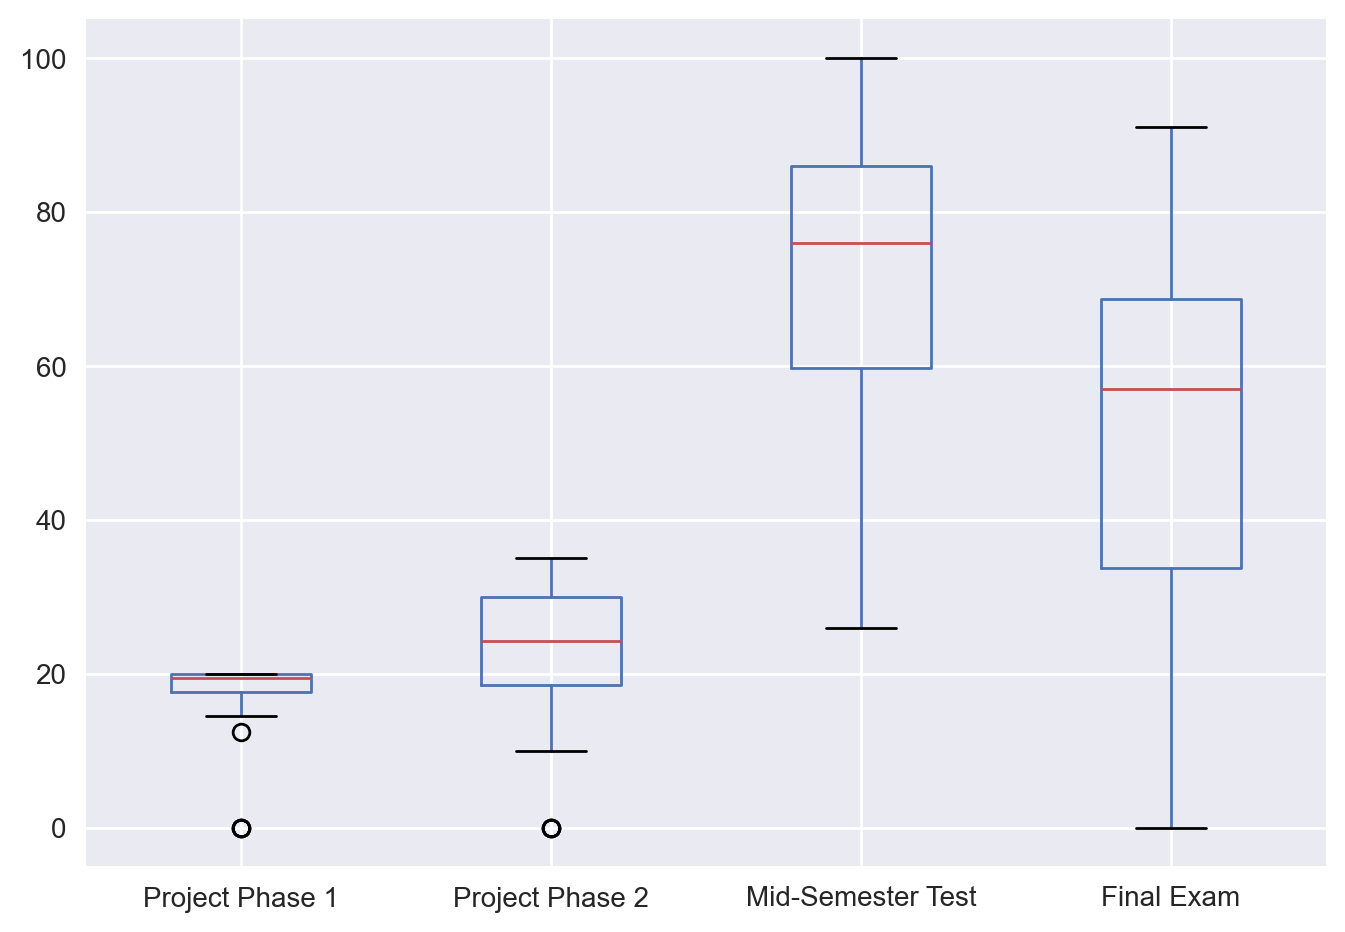

In [51]:
grades.boxplot(column=['Project Phase 1', 'Project Phase 2', 'Mid-Semester Test', 'Final Exam']);

Alternatively, we can examine the histogram of these columns.

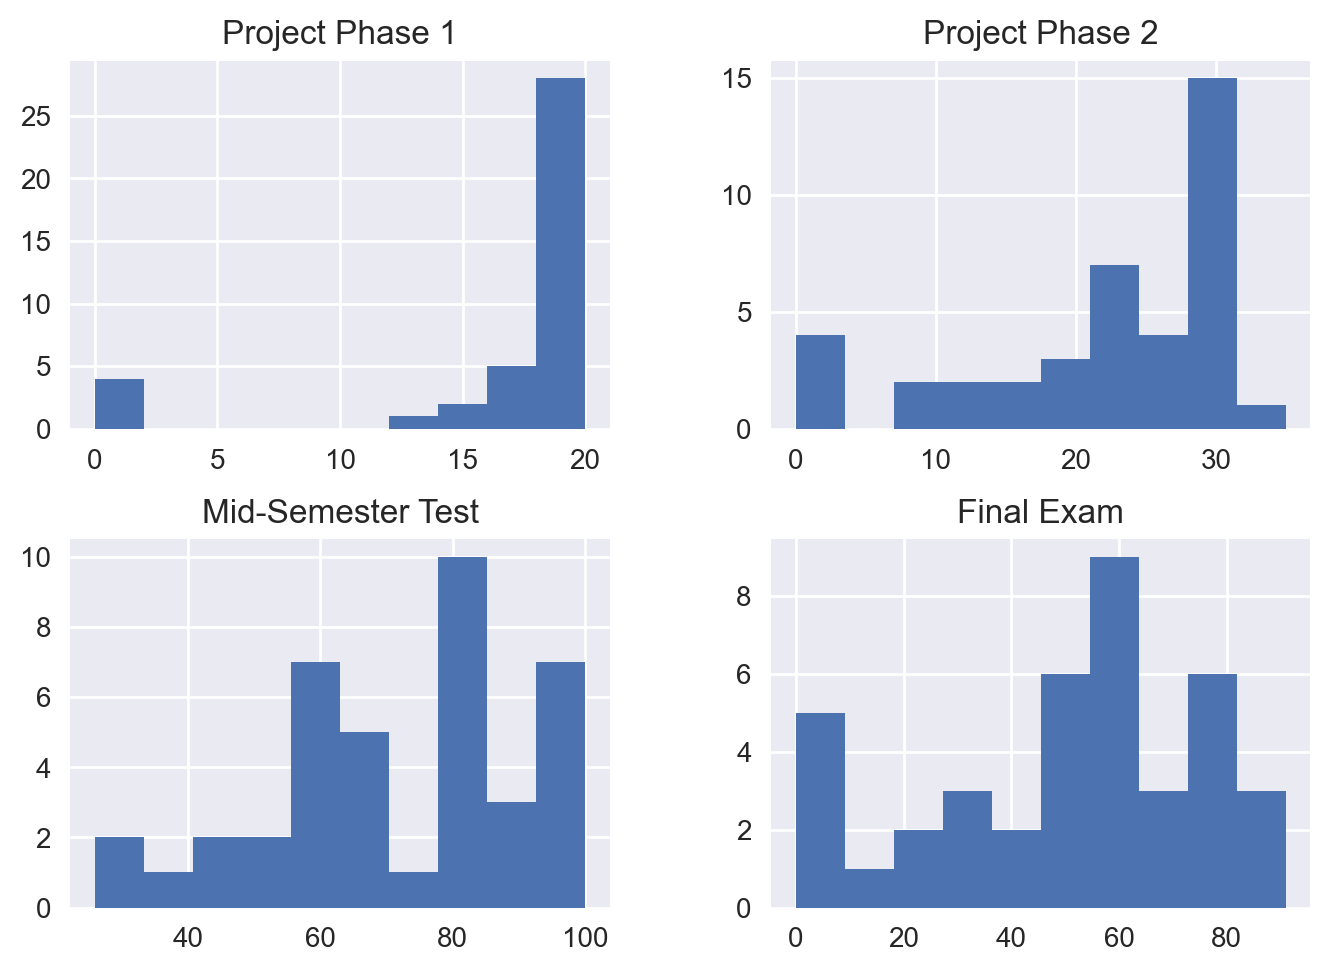

In [52]:
grades.hist(column=['Project Phase 1', 'Project Phase 2', 'Mid-Semester Test', 'Final Exam']);

## Saving a DataFrame

Pandas allows for saving DataFrame objects in various formats, including CSV, Excel, JSON, HTML, and SQL. Let's save `grades` as a new file in CSV format with all the modifications we performed. Before saving, let's shorten the long column names and then take a peak at the final data.

In [53]:
grades.rename(columns={'Project Phase 1': 'Project 1',
                       'Project Phase 2': 'Project 2',
                       'Mid-Semester Test': 'Test'}, 
              inplace=True)
grades.head(10)

,Gender,Project 1,Project 2,Test,Final Exam,Grade
0,Male,18.25,15.5,94,61.0,PA
1,Female,17.75,30.0,79,62.0,PA
2,Male,0.00,0.0,78,15.0,NN
3,Male,20.00,25.0,69,65.0,PA
4,Male,18.75,30.0,96,51.0,PA
5,Male,17.00,23.5,80,59.0,PA
6,Unknown,19.75,19.5,82,76.0,PA
7,Male,20.00,28.0,95,44.0,PA
8,Male,18.00,23.0,50,33.0,NN
9,Female,20.00,30.0,92,63.0,PA


In [54]:
grades.to_csv("grades_saved.csv", index=False)

You can now open this CSV file in Excel (or your favorite text editor) to see its contents.

***